# Stock Predictor for Apple stock (APPL)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
prices_dataset =  pd.read_csv('AAPL.csv', header=0)
prices_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/7/2009,20.178572,20.404285,19.969999,140.020004,18.066357,92619800
1,6/7/2009,19.814285,19.855715,19.464285,138.610001,17.884430,124672100
2,7/7/2009,19.782858,19.954287,19.311428,135.399994,17.470257,115399200
3,8/7/2009,19.417143,19.719999,19.202858,137.220001,17.705082,143982300
4,9/7/2009,19.680000,19.712856,19.418571,136.360001,17.594120,85756300


In [3]:
prices_dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2009,26/6/2017,147.169998,148.279999,145.380005,145.820007,145.820007,25692400
2010,27/6/2017,145.009995,146.160004,143.619995,143.729996,143.729996,24761900
2011,28/6/2017,144.490005,146.110001,143.160004,145.830002,145.830002,22082400
2012,29/6/2017,144.710007,145.130005,142.279999,143.679993,143.679993,31293800
2013,30/6/2017,144.449997,144.960007,143.779999,144.020004,144.020004,23024107


In [8]:
prices_dataset.isnull().any().any()  #Check if there are any NaN values

False

In [15]:
prices_dataset = prices_dataset.drop(['Open','High','Low'], axis = 1)
prices_dataset.tail()

,Date,Close,Adj Close,Volume
2009,26/6/2017,145.820007,145.820007,25692400
2010,27/6/2017,143.729996,143.729996,24761900
2011,28/6/2017,145.830002,145.830002,22082400
2012,29/6/2017,143.679993,143.679993,31293800
2013,30/6/2017,144.020004,144.020004,23024107


In [18]:
#AdjCloseList = prices_dataset['Adj Close']
#N = 5
#AdjClose_cumsum, AdjClose_moving_aver = [0], []

#for i, x in enumerate(AdjCloseList, 1):
#    AdjClose_cumsum.append(AdjClose_cumsum[i-1] + x)
#    if i>=N:
#        AdjClose_moving_ave = (AdjClose_cumsum[i] - AdjClose_cumsum[i-N])/N
        #can do stuff with moving_ave here
#        AdjClose_moving_aver.append(AdjClose_moving_ave)

In [23]:
#pd.rolling_mean(prices_dataset['Adj Close'], 5)
prices_dataset['AdjClose_ma'] = prices_dataset['Adj Close'].rolling(window=5,center=False).mean() #cancel out noise
prices_dataset.tail()

,Date,Close,Adj Close,Volume,AdjClose_ma
2009,26/6/2017,145.820007,145.820007,25692400,145.722000
2010,27/6/2017,143.729996,143.729996,24761900,145.466000
2011,28/6/2017,145.830002,145.830002,22082400,145.458002
2012,29/6/2017,143.679993,143.679993,31293800,145.067999
2013,30/6/2017,144.020004,144.020004,23024107,144.616000


In [26]:
daily_returns = prices_dataset['Adj Close'].pct_change(1) # 1 for ONE DAY lookback
prices_dataset['daily_returns'] = daily_returns+1.0 #we want pct change!!
prices_dataset.tail()

,Date,Close,Adj Close,Volume,AdjClose_ma,daily_returns
2009,26/6/2017,145.820007,145.820007,25692400,145.722000,0.996855
2010,27/6/2017,143.729996,143.729996,24761900,145.466000,0.985667
2011,28/6/2017,145.830002,145.830002,22082400,145.458002,1.014611
2012,29/6/2017,143.679993,143.679993,31293800,145.067999,0.985257
2013,30/6/2017,144.020004,144.020004,23024107,144.616000,1.002366


In [31]:
#calculate MACD
EWMA26 = prices_dataset['Adj Close'].ewm(ignore_na=False,span=26,min_periods=26,adjust=True).mean()
EWMA12 = prices_dataset['Adj Close'].ewm(ignore_na=False,span=12,min_periods=12,adjust=True).mean()
prices_dataset['MACD'] = EWMA12 - EWMA26
prices_dataset.tail()

,Date,Close,Adj Close,Volume,AdjClose_ma,daily_returns,MACD
2009,26/6/2017,145.820007,145.820007,25692400,145.722000,0.996855,-1.469609
2010,27/6/2017,143.729996,143.729996,24761900,145.466000,0.985667,-1.600505
2011,28/6/2017,145.830002,145.830002,22082400,145.458002,1.014611,-1.517297
2012,29/6/2017,143.679993,143.679993,31293800,145.067999,0.985257,-1.606325
2013,30/6/2017,144.020004,144.020004,23024107,144.616000,1.002366,-1.630647


In [37]:
prices_dataset['AdjClose_to_ma'] = prices_dataset['Adj Close']/prices_dataset['AdjClose_ma']
prices_dataset[0:30]

,Date,Close,Adj Close,Volume,AdjClose_ma,daily_returns,MACD,AdjClose_to_ma
0,2/7/2009,140.020004,18.066357,92619800,NaN,NaN,NaN,NaN
1,6/7/2009,138.610001,17.884430,124672100,NaN,0.989930,NaN,NaN
2,7/7/2009,135.399994,17.470257,115399200,NaN,0.976842,NaN,NaN
3,8/7/2009,137.220001,17.705082,143982300,NaN,1.013441,NaN,NaN
4,9/7/2009,136.360001,17.594120,85756300,17.744049,0.993733,NaN,0.991550
5,10/7/2009,138.520004,17.872822,111318900,17.705342,1.015841,NaN,1.009459
6,13/7/2009,142.339996,18.365702,120875300,17.801597,1.027577,NaN,1.031688
7,14/7/2009,142.270004,18.356665,86811900,17.978878,0.999508,NaN,1.021013
8,15/7/2009,146.880005,18.951488,121396800,18.228159,1.032404,NaN,1.039682
9,16/7/2009,147.520004,19.034061,98392700,18.516148,1.004357,NaN,1.027971


In [38]:
PE_ratio =  pd.read_csv('APPL_Price_to_Earnings.csv', header=0)
PE_ratio

,Quarters,Dates,Price to Earnings
0,Q3 2009,27/6/2009,16.22
1,Q4 2009,26/9/2009,20.11
2,Q1 2010,26/12/2009,20.41
3,Q2 2010,27/3/2010,19.60
4,Q3 2010,26/6/2010,20.08
5,Q4 2010,25/9/2010,19.30
6,Q1 2011,25/12/2010,18.07
7,Q2 2011,26/3/2011,16.76
8,Q3 2011,25/6/2011,12.92
9,Q4 2011,24/9/2011,14.61


In [53]:
from datetime import datetime as dt

PE = pd.Series(data = 0.0, index = prices_dataset.index, dtype = float)

for inx in range(len(prices_dataset.index)):
    for jnx in range(len(PE_ratio.index)): 
        if dt.strptime(prices_dataset['Date'][inx], "%d/%m/%Y")>dt.strptime(PE_ratio['Dates'][jnx], "%d/%m/%Y"):
            PE[inx] = PE_ratio['Price to Earnings'][jnx]

0       16.22
1       16.22
2       16.22
3       16.22
4       16.22
5       16.22
6       16.22
7       16.22
8       16.22
9       16.22
10      16.22
11      16.22
12      16.22
13      16.22
14      16.22
15      16.22
16      16.22
17      16.22
18      16.22
19      16.22
20      16.22
21      16.22
22      16.22
23      16.22
24      16.22
25      16.22
26      16.22
27      16.22
28      16.22
29      16.22
        ...  
1984    16.80
1985    16.80
1986    16.80
1987    16.80
1988    16.80
1989    16.80
1990    16.80
1991    16.80
1992    16.80
1993    16.80
1994    16.80
1995    16.80
1996    16.80
1997    16.80
1998    16.80
1999    16.80
2000    16.80
2001    16.80
2002    16.80
2003    16.80
2004    16.80
2005    16.80
2006    16.80
2007    16.80
2008    16.80
2009    16.80
2010    16.80
2011    16.80
2012    16.80
2013    16.80
dtype: float64

In [54]:
prices_dataset['PE'] = PE

,Date,Close,Adj Close,Volume,AdjClose_ma,daily_returns,MACD,AdjClose_to_ma,PE
30,14/8/2009,166.779999,21.519119,76454000,21.368417,0.990262,0.445532,1.007053,16.22
31,17/8/2009,159.589996,20.591417,131095300,21.236035,0.956889,0.365796,0.969645,16.22
32,18/8/2009,164.000000,21.160429,107788100,21.266229,1.027633,0.341384,0.995025,16.22
33,19/8/2009,164.600006,21.237843,103317900,21.247907,1.003658,0.324122,0.999526,16.22
34,20/8/2009,166.330002,21.461061,85507800,21.193974,1.010510,0.323594,1.012602,16.22
35,21/8/2009,169.220001,21.833954,104018600,21.256941,1.017375,0.347496,1.027145,16.22
36,24/8/2009,169.059998,21.813307,101732400,21.501319,0.999054,0.360640,1.014510,16.22
37,25/8/2009,169.400009,21.857182,81088700,21.640669,1.002011,0.370107,1.010005,16.22
38,26/8/2009,167.410004,21.600409,75999700,21.713183,0.988252,0.353718,0.994806,16.22
39,27/8/2009,169.450012,21.863626,112295400,21.793696,1.012186,0.356937,1.003209,16.22


In [62]:
APPL_df = prices_dataset.dropna(axis=0, how='any')
APPL_df = (APPL_df.reset_index()).drop('index',axis = 1)
APPL_df

,Date,Close,Adj Close,Volume,AdjClose_ma,daily_returns,MACD,AdjClose_to_ma,PE
0,7/8/2009,165.509995,21.355257,96838700,21.328419,1.009761,0.499441,1.001258,16.22
1,10/8/2009,164.720001,21.253325,75073600,21.284292,0.995227,0.483160,0.998545,16.22
2,11/8/2009,162.830002,21.009460,88835600,21.214100,0.988526,0.447396,0.990354,16.22
3,12/8/2009,165.309998,21.329453,111267800,21.219262,1.015231,0.437357,1.005193,16.22
4,13/8/2009,168.419998,21.730726,109995200,21.335644,1.018813,0.453587,1.018517,16.22
5,14/8/2009,166.779999,21.519119,76454000,21.368417,0.990262,0.445532,1.007053,16.22
6,17/8/2009,159.589996,20.591417,131095300,21.236035,0.956889,0.365796,0.969645,16.22
7,18/8/2009,164.000000,21.160429,107788100,21.266229,1.027633,0.341384,0.995025,16.22
8,19/8/2009,164.600006,21.237843,103317900,21.247907,1.003658,0.324122,0.999526,16.22
9,20/8/2009,166.330002,21.461061,85507800,21.193974,1.010510,0.323594,1.012602,16.22


In [63]:
X = APPL_df[['MACD','AdjClose_to_ma','PE']]
Y = APPL_df['Adj Close'][9:] #stock price 10 days later

In [69]:
Y = (Y.reset_index()).drop('index',axis = 1)
Data_points = (X.join(Y)).dropna(axis=0, how='any')
Data_points

,MACD,AdjClose_to_ma,PE,Adj Close
0,0.499441,1.001258,16.22,21.461061
1,0.483160,0.998545,16.22,21.833954
2,0.447396,0.990354,16.22,21.813307
3,0.437357,1.005193,16.22,21.857182
4,0.453587,1.018517,16.22,21.600409
5,0.445532,1.007053,16.22,21.863626
6,0.365796,0.969645,16.22,21.941042
7,0.341384,0.995025,16.22,21.703629
8,0.324122,0.999526,16.22,21.328165
9,0.323594,1.012602,16.22,21.312681


In [71]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    min_max_scaler = MinMaxScaler()
    df['MACD'] = min_max_scaler.fit_transform(df.MACD.values.reshape(-1,1))
    df['AdjClose_to_ma'] = min_max_scaler.fit_transform(df.AdjClose_to_ma.values.reshape(-1,1))
    df['PE'] = min_max_scaler.fit_transform(df.PE.values.reshape(-1,1))
    df['Adj Close'] = min_max_scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))
    return df
df = normalize_data(Data_points)
df.head()

,MACD,AdjClose_to_ma,PE,Adj Close
0,0.520229,0.587096,0.601332,0.001101
1,0.518406,0.569405,0.601332,0.003867
2,0.514402,0.515992,0.601332,0.003714
3,0.513278,0.612753,0.601332,0.004040
4,0.515095,0.699635,0.601332,0.002135


In [74]:
len(df)

1980

In [75]:
train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]
print(len(train), len(test))

(1386, 594)


In [117]:
test = (test.reset_index()).drop('index',axis = 1)

In [118]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=10):
    dataX, dataY = [], []
    for i in range(len(dataset)):
        a = dataset[['MACD','AdjClose_to_ma','PE']][i:(i+look_back)].values
        dataX.append(a)
        dataY.append(dataset['Adj Close'][i])
    return np.array(dataX), np.array(dataY)

In [119]:
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

In [120]:
print (trainX[0], trainY[0])

(array([[ 0.52022867,  0.58709635,  0.60133206],
       [ 0.51840603,  0.5694046 ,  0.60133206],
       [ 0.5144023 ,  0.51599153,  0.60133206],
       [ 0.51327836,  0.61275251,  0.60133206],
       [ 0.51509539,  0.69963521,  0.60133206],
       [ 0.51419364,  0.62487802,  0.60133206],
       [ 0.50526721,  0.38096101,  0.60133206],
       [ 0.50253422,  0.54645164,  0.60133206],
       [ 0.50060181,  0.57580305,  0.60133206],
       [ 0.50054266,  0.66106349,  0.60133206]]), 0.0011008453502582283)


In [121]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras

d=0.2
model = Sequential()
model.add(LSTM(128, input_shape=(10, 3), return_sequences=True))
model.add(Dropout(d))

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(d))

model.add(Dense(16, kernel_initializer="uniform",activation='relu'))
model.add(Dense(1, kernel_initializer="uniform",activation='relu'))

model.compile(loss='mse', optimizer='rmsprop')

ImportError: No module named keras.models

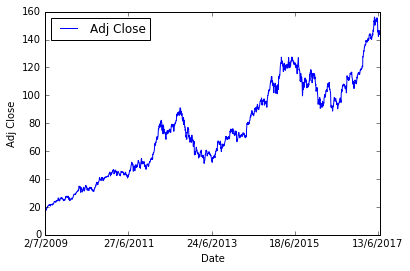

In [7]:
prices_DateIndex=prices_dataset.set_index('Date')

prices_DateIndex['Adj Close'].plot(); plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()